In [1]:
from PIL import Image , ImageOps
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

In [2]:
# import os
# from os import listdir
# from os.path import isfile, join
# mypath = os.getcwd() + '\\mouth_expression'
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# onlyfiles

['angry.png',
 'angry_2.png',
 'bore.png',
 'bore_2.png',
 'content.png',
 'content_2.png',
 'glare.png',
 'glare_2.png',
 'happy.png',
 'happy_2.png',
 'sad.png',
 'sad_2.png',
 'scard.png',
 'scard_2.png',
 'worried.png',
 'worried_2.png']

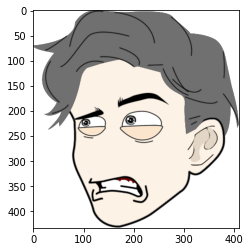

In [3]:
# # Opening the primary image (used in background)
# face = Image.open(r"head/face.png")
  
# # Opening the secondary image (overlay image)
# eye = Image.open(r"side_eyes/worried_2/worried_2_L.png")
# eye = eye.resize((191,100))
# face.paste(eye, (80,165), mask = eye)
  
# # Displaying the image


# mouth = Image.open(r"mouth_expression/worried_2.png")
# im_mirror = ImageOps.mirror(mouth)
# # mouth = im_mirror.resize((110,45))
# mouth = mouth.resize((120,55))
# face.paste(mouth, (110,330), mask = mouth)
# # face.show()

# face.save('frames/new_G2.png')
# # img = mpimg.imread('your_image.png')
# imgplot = plt.imshow(face)
# plt.show()

In [4]:
list_for_LMR = ['_L','_M','_R']
list_for_expressions = ['angry','angry_2','happy','happy_2','sad','sad_2',
                        'content','content_2','bore','bore_2','glare','glare_2',
                        'sarcasm','sarcasm_2','worried','worried_2']

In [12]:
def create_frame(face,eye,mouth,frm_num):
    # Opening the primary image (used in background)
    face = Image.open(face)
  
    # Opening the secondary image (overlay image)
    eye = Image.open(eye)
    eye = eye.resize((191,100))
    face.paste(eye, (80,165), mask = eye)
  
    # Displaying the image


    mouth = Image.open(mouth)
#     im_mirror = ImageOps.mirror(mouth)
    # mouth = im_mirror.resize((110,45))
    mouth = mouth.resize((120,55))
    face.paste(mouth, (110,330), mask = mouth)
    # face.show()

    face.save(f'frames/{str(frm_num)}.png')
    # img = mpimg.imread('your_image.png')
#     imgplot = plt.imshow(face)
#     plt.show()
    return frm_num + 1
    

In [13]:
fram = 1
face = f"head/face.png"


for i in tqdm(range(len(list_for_expressions))):
    for j in range(len(list_for_LMR)):
        expression = list_for_expressions[i]
        mouth = f"mouth_expression/{list_for_expressions[i]}.png"
        for k in range(10):
            eye = f"side_eyes/{expression}/{expression}{list_for_LMR[j]}.png"
            fram = create_frame(face,eye,mouth,fram)
        
            
####################################################################################            
        # Blinking part
        eye = f"side_eyes/{expression}/{expression}{list_for_LMR[j]}.png"
        fram = create_frame(face,eye,mouth,fram)
        eye = f"side_eyes_blinking/{expression}/{expression}{list_for_LMR[j]}.png"
        fram = create_frame(face,eye,mouth,fram)
        eye = f"side_eyes_blinking/{expression}/02.png"
        fram = create_frame(face,eye,mouth,fram)
        eye = f"side_eyes_blinking/{expression}/03.png"
        fram = create_frame(face,eye,mouth,fram)
        eye = f"side_eyes_blinking/{expression}/04.png"
        fram = create_frame(face,eye,mouth,fram)
        eye = f"side_eyes_blinking/{expression}/{expression}{list_for_LMR[j]}.png"
        fram = create_frame(face,eye,mouth,fram)
        eye = f"side_eyes/{expression}/{expression}{list_for_LMR[j]}.png"
        fram = create_frame(face,eye,mouth,fram)
####################################################################################

        for k in range(10):
            eye = f"side_eyes/{expression}/{expression}{list_for_LMR[j]}.png"
            fram = create_frame(face,eye,mouth,fram)
        
    

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:56<00:00,  3.52s/it]


In [16]:
import cv2
import numpy as np
import os
import json

from os.path import isfile, join
mypath = './frames/'

# frame_data = open('./json/json_data_for_frame/jamal_phonemes.json')

# frame_data = json.load(frame_data)


def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

    #for sorting the file names properly
    # files.sort(key = lambda x: int(x[5:-4]))
    

    for counter in range(1,1297):

                # print(number)
            files = str(counter) + '.png'
            print(files)

            filename=pathIn + files
            img = cv2.imread(filename)
            height, width, layers = img.shape
            size = (width,height)
#             print(filename)
            #inserting the frames into an image array
            frame_array.append(img)

    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

def main():
    pathIn= './frames/'
    pathOut = 'video2.avi'
    fps = 24.0
    convert_frames_to_video(pathIn, pathOut, fps)

if __name__=="__main__":
    main()

1.png
./frames/1.png
2.png
./frames/2.png
3.png
./frames/3.png
4.png
./frames/4.png
5.png
./frames/5.png
6.png
./frames/6.png
7.png
./frames/7.png
8.png
./frames/8.png
9.png
./frames/9.png
10.png
./frames/10.png
11.png
./frames/11.png
12.png
./frames/12.png
13.png
./frames/13.png
14.png
./frames/14.png
15.png
./frames/15.png
16.png
./frames/16.png
17.png
./frames/17.png
18.png
./frames/18.png
19.png
./frames/19.png
20.png
./frames/20.png
21.png
./frames/21.png
22.png
./frames/22.png
23.png
./frames/23.png
24.png
./frames/24.png
25.png
./frames/25.png
26.png
./frames/26.png
27.png
./frames/27.png
28.png
./frames/28.png
29.png
./frames/29.png
30.png
./frames/30.png
31.png
./frames/31.png
32.png
./frames/32.png
33.png
./frames/33.png
34.png
./frames/34.png
35.png
./frames/35.png
36.png
./frames/36.png
37.png
./frames/37.png
38.png
./frames/38.png
39.png
./frames/39.png
40.png
./frames/40.png
41.png
./frames/41.png
42.png
./frames/42.png
43.png
./frames/43.png
44.png
./frames/44.png
45.png

./frames/341.png
342.png
./frames/342.png
343.png
./frames/343.png
344.png
./frames/344.png
345.png
./frames/345.png
346.png
./frames/346.png
347.png
./frames/347.png
348.png
./frames/348.png
349.png
./frames/349.png
350.png
./frames/350.png
351.png
./frames/351.png
352.png
./frames/352.png
353.png
./frames/353.png
354.png
./frames/354.png
355.png
./frames/355.png
356.png
./frames/356.png
357.png
./frames/357.png
358.png
./frames/358.png
359.png
./frames/359.png
360.png
./frames/360.png
361.png
./frames/361.png
362.png
./frames/362.png
363.png
./frames/363.png
364.png
./frames/364.png
365.png
./frames/365.png
366.png
./frames/366.png
367.png
./frames/367.png
368.png
./frames/368.png
369.png
./frames/369.png
370.png
./frames/370.png
371.png
./frames/371.png
372.png
./frames/372.png
373.png
./frames/373.png
374.png
./frames/374.png
375.png
./frames/375.png
376.png
./frames/376.png
377.png
./frames/377.png
378.png
./frames/378.png
379.png
./frames/379.png
380.png
./frames/380.png
381.png


./frames/670.png
671.png
./frames/671.png
672.png
./frames/672.png
673.png
./frames/673.png
674.png
./frames/674.png
675.png
./frames/675.png
676.png
./frames/676.png
677.png
./frames/677.png
678.png
./frames/678.png
679.png
./frames/679.png
680.png
./frames/680.png
681.png
./frames/681.png
682.png
./frames/682.png
683.png
./frames/683.png
684.png
./frames/684.png
685.png
./frames/685.png
686.png
./frames/686.png
687.png
./frames/687.png
688.png
./frames/688.png
689.png
./frames/689.png
690.png
./frames/690.png
691.png
./frames/691.png
692.png
./frames/692.png
693.png
./frames/693.png
694.png
./frames/694.png
695.png
./frames/695.png
696.png
./frames/696.png
697.png
./frames/697.png
698.png
./frames/698.png
699.png
./frames/699.png
700.png
./frames/700.png
701.png
./frames/701.png
702.png
./frames/702.png
703.png
./frames/703.png
704.png
./frames/704.png
705.png
./frames/705.png
706.png
./frames/706.png
707.png
./frames/707.png
708.png
./frames/708.png
709.png
./frames/709.png
710.png


./frames/1017.png
1018.png
./frames/1018.png
1019.png
./frames/1019.png
1020.png
./frames/1020.png
1021.png
./frames/1021.png
1022.png
./frames/1022.png
1023.png
./frames/1023.png
1024.png
./frames/1024.png
1025.png
./frames/1025.png
1026.png
./frames/1026.png
1027.png
./frames/1027.png
1028.png
./frames/1028.png
1029.png
./frames/1029.png
1030.png
./frames/1030.png
1031.png
./frames/1031.png
1032.png
./frames/1032.png
1033.png
./frames/1033.png
1034.png
./frames/1034.png
1035.png
./frames/1035.png
1036.png
./frames/1036.png
1037.png
./frames/1037.png
1038.png
./frames/1038.png
1039.png
./frames/1039.png
1040.png
./frames/1040.png
1041.png
./frames/1041.png
1042.png
./frames/1042.png
1043.png
./frames/1043.png
1044.png
./frames/1044.png
1045.png
./frames/1045.png
1046.png
./frames/1046.png
1047.png
./frames/1047.png
1048.png
./frames/1048.png
1049.png
./frames/1049.png
1050.png
./frames/1050.png
1051.png
./frames/1051.png
1052.png
./frames/1052.png
1053.png
./frames/1053.png
1054.png
.